<a href="https://colab.research.google.com/github/amelkusmayadi200212/Machine-Learning/blob/main/Linear_Regresi_FinancialMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ameliani Kusmayadi

NIM : 1103213044

Kelas : TK-45-06

In [3]:
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk perhitungan numerik
import matplotlib.pyplot as plt  # Untuk visualisasi grafik
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi data latih dan uji
from sklearn.linear_model import LinearRegression  # Model regresi linear biasa
from sklearn.preprocessing import PolynomialFeatures  # Untuk basis fungsi polinomial
from sklearn.metrics import mean_squared_error, r2_score  # Untuk metrik evaluasi
from sklearn.pipeline import make_pipeline  # Untuk membuat pipeline model

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/FinancialMarket.csv")
df.head()

,x,combined_data
0,0.00000,0.003073
1,0.01001,0.033492
2,0.02002,-0.027269
3,0.03003,0.176319
4,0.04004,-0.006027


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   x              1000 non-null   float64
 1   combined_data  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [6]:
X = df[['x']]  # Fitur (kolom yang digunakan untuk prediksi)
y = df['combined_data']  # Target (kolom yang ingin diprediksi)

#Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Regresi Linear Biasa**

In [7]:
# Inisialisasi model regresi linear
linear_model = LinearRegression()

# Melatih model dengan data latih
linear_model.fit(X_train, y_train)

# Melakukan prediksi dengan data uji
y_pred_linear = linear_model.predict(X_test)

# Menghitung metrik evaluasi untuk regresi linear
mse_linear = mean_squared_error(y_test, y_pred_linear)  # Mean Squared Error
rmse_linear = np.sqrt(mse_linear)  # Root Mean Squared Error
r2_linear = r2_score(y_test, y_pred_linear)  # R-squared

# Menampilkan hasil evaluasi regresi linear
print("Regresi Linear Biasa:")
print(f"MSE: {mse_linear:.2f}")
print(f"RMSE: {rmse_linear:.2f}")
print(f"R-squared: {r2_linear:.2f}")

Regresi Linear Biasa:
MSE: 9.40
RMSE: 3.07
R-squared: 0.68


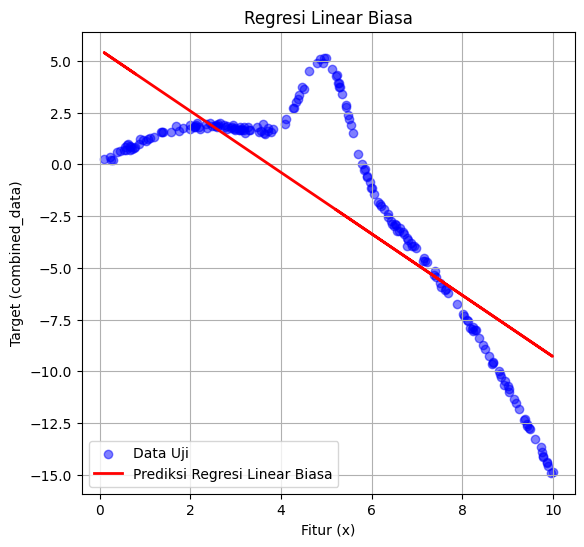

In [8]:
# Visualisasi Hasil untuk Regresi Linear Biasa
plt.figure(figsize=(14, 6))

# Subplot untuk Regresi Linear Biasa
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Data Uji', alpha=0.5)  # Data uji
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Prediksi Regresi Linear Biasa')  # Garis prediksi
plt.title('Regresi Linear Biasa')
plt.xlabel('Fitur (x)')
plt.ylabel('Target (combined_data)')
plt.legend()
plt.grid()

**Regresi Linear dengan Basis Fungsi**

In [9]:
# Menggunakan PolynomialFeatures untuk membuat basis fungsi
degree = 2  # Derajat polinomial
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Melatih model dengan data latih
poly_model.fit(X_train, y_train)

# Melakukan prediksi dengan data uji
y_pred_poly = poly_model.predict(X_test)

# Menghitung metrik evaluasi untuk regresi polinomial
mse_poly = mean_squared_error(y_test, y_pred_poly)  # Mean Squared Error
rmse_poly = np.sqrt(mse_poly)  # Root Mean Squared Error
r2_poly = r2_score(y_test, y_pred_poly)  # R-squared

# Menampilkan hasil evaluasi regresi polinomial
print("\nRegresi Linear dengan Basis Fungsi:")
print(f"MSE: {mse_poly:.2f}")
print(f"RMSE: {rmse_poly:.2f}")
print(f"R-squared: {r2_poly:.2f}")


Regresi Linear dengan Basis Fungsi:
MSE: 1.35
RMSE: 1.16
R-squared: 0.95


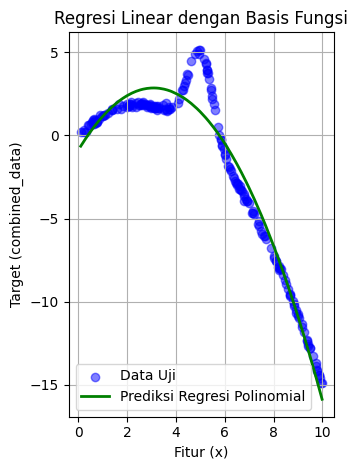

In [10]:
# Visualisasi Hasil untuk Regresi Linear dengan Basis Fungsi
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Data Uji', alpha=0.5)  # Data uji

# Mengurutkan data untuk plot yang lebih baik
X_test_sorted = np.sort(X_test.values, axis=0)
# Membuat DataFrame dari X_test_sorted dengan nama kolom yang sesuai
X_test_sorted_df = pd.DataFrame(X_test_sorted, columns=X.columns)

# Melakukan prediksi untuk data yang sudah diurutkan
y_pred_poly_sorted = poly_model.predict(X_test_sorted_df)

# Plot garis prediksi
plt.plot(X_test_sorted, y_pred_poly_sorted, color='green', linewidth=2, label='Prediksi Regresi Polinomial')
plt.title('Regresi Linear dengan Basis Fungsi')
plt.xlabel('Fitur (x)')
plt.ylabel('Target (combined_data)')
plt.legend()
plt.grid()

# Menampilkan grafik
plt.tight_layout()
plt.show()

**Perbandingan Hasil**

In [11]:
#Perbandingan Hasil
print("\nPerbandingan Hasil:")
print(f"Regresi Linear Biasa: MSE = {mse_linear:.2f}, RMSE = {rmse_linear:.2f}, R-squared = {r2_linear:.2f}")
print(f"Regresi Linear dengan Basis Fungsi: MSE = {mse_poly:.2f}, RMSE = {rmse_poly:.2f}, R-squared = {r2_poly:.2f}")


Perbandingan Hasil:
Regresi Linear Biasa: MSE = 9.40, RMSE = 3.07, R-squared = 0.68
Regresi Linear dengan Basis Fungsi: MSE = 1.35, RMSE = 1.16, R-squared = 0.95


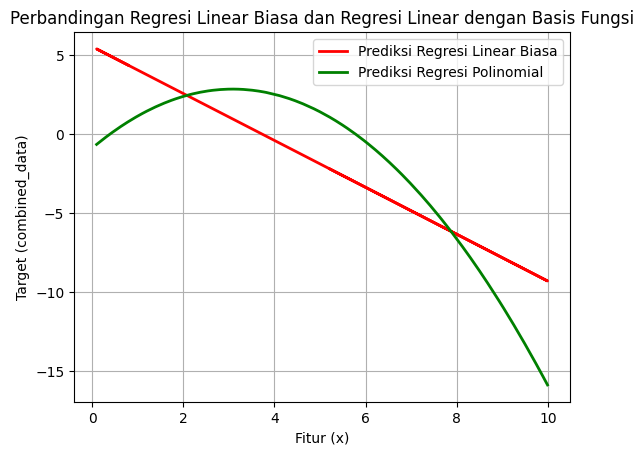

In [12]:
# Plot garis regresi linear biasa
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Prediksi Regresi Linear Biasa')

# Plot garis regresi linear dengan basis fungsi
X_test_sorted = np.sort(X_test.values, axis=0)  # Mengurutkan data untuk plot yang lebih baik
# Buat DataFrame dari X_test_sorted dengan nama kolom yang sesuai
X_test_sorted_df = pd.DataFrame(X_test_sorted, columns=X.columns)
y_pred_poly_sorted = poly_model.predict(X_test_sorted_df)  # Prediksi untuk data yang sudah diurutkan
plt.plot(X_test_sorted, y_pred_poly_sorted, color='green', linewidth=2, label='Prediksi Regresi Polinomial')

# Pengaturan grafik
plt.title('Perbandingan Regresi Linear Biasa dan Regresi Linear dengan Basis Fungsi')
plt.xlabel('Fitur (x)')
plt.ylabel('Target (combined_data)')
plt.legend()
plt.grid()

# Menampilkan grafik
plt.show()